## Analyzing bidding behaviour of ACs and PCs

Nr of bids of every kind...

In [1]:
import pandas as pd
from cmt_analysis_utils import read_bids, add_bidcounts_to_papers

In [2]:
# Papers, # CMT: Submissions :: Actions -> Export to Excel -> Submissions, then in Excel save as Papers.csv
df_papers = pd.read_csv("data/Papers.csv", delimiter=',', skiprows=2, index_col='Paper ID')

In [3]:
filename = "data/Bids.xml" # Submissions -> Actions -> Export to XML -> Reviewer Bids
df_pc_bids = read_bids(filename)
len(df_pc_bids.index)

17

In [4]:
df_papers_pc = add_bidcounts_to_papers(df_papers, df_pc_bids)

# ignore Withdrawns or Desk Rejected
df_papers_pc = df_papers_pc[df_papers_pc['Status'] == 'Awaiting Decision'] 
len(df_papers_pc.index)

3

<Axes: title={'center': 'Papers with this many positive bids (PC)'}, xlabel='posbids'>

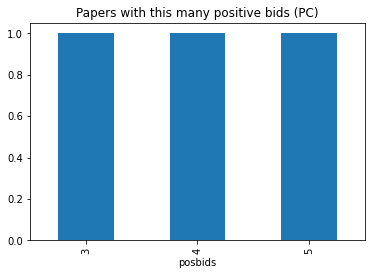

In [5]:
df_papers_pc['posbids'] = df_papers_pc[['3 - In A Pinch', '4 - Willing', '5 - Eager']].sum(axis=1)
df_papers_pc['posbids'].value_counts().sort_index().plot.bar(title="Papers with this many positive bids (PC)")

In [6]:
#df_papers_pc[df_papers_pc['posbids'] <= 3]

<Axes: >

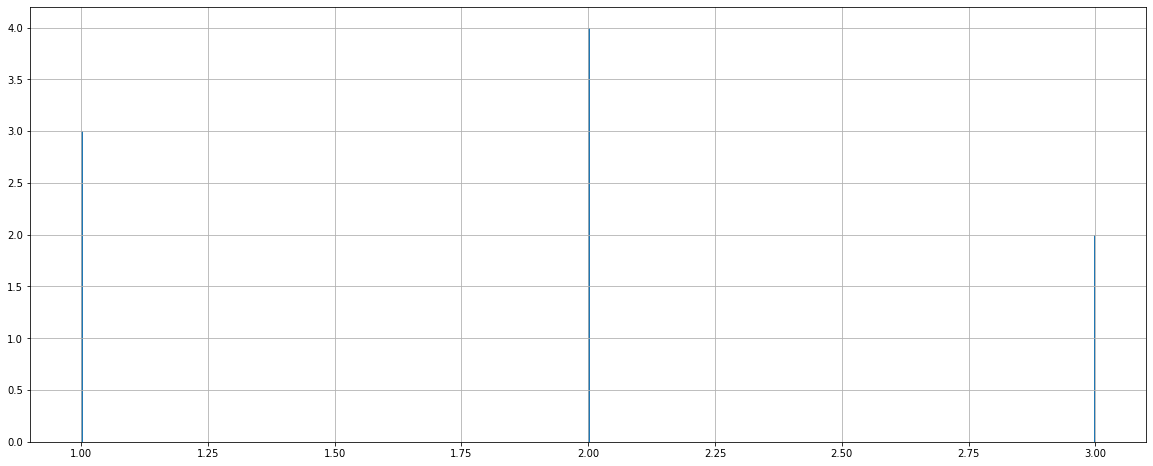

In [7]:
# Per reviewer, nr bids
df_pc_bids.groupby('Email')['Bid_nr'].count().hist(bins=600, figsize=(20,8))

<Axes: >

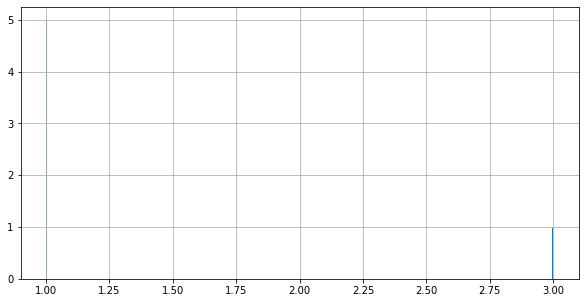

In [8]:
# Per reviewer, nr POSTIVE bids
df_pc_bids[df_pc_bids['Bid_nr']>=3].groupby('Email')['Bid_nr'].count().hist(bins=600, figsize=(10,5))

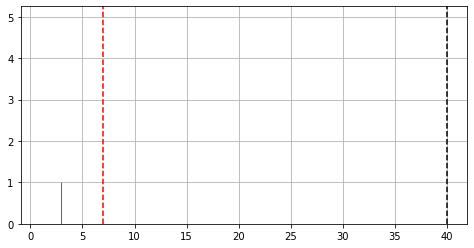

In [9]:
# Per reviewer, nr POSITIVE bids (zoom in)
tmp = df_pc_bids[df_pc_bids['Bid_nr']>=3].groupby('Email')['Bid_nr'].count()
ax = tmp[tmp < 200].hist(bins=100, figsize=(8,4))
ax.axvline(x=7, color='r', linestyle='--')
ax.axvline(x=40, color='k', linestyle='--')

array([[<Axes: title={'center': '2 - Not Willing'}>,
        <Axes: title={'center': '3 - In A Pinch'}>],
       [<Axes: title={'center': '4 - Willing'}>,
        <Axes: title={'center': '5 - Eager'}>]], dtype=object)

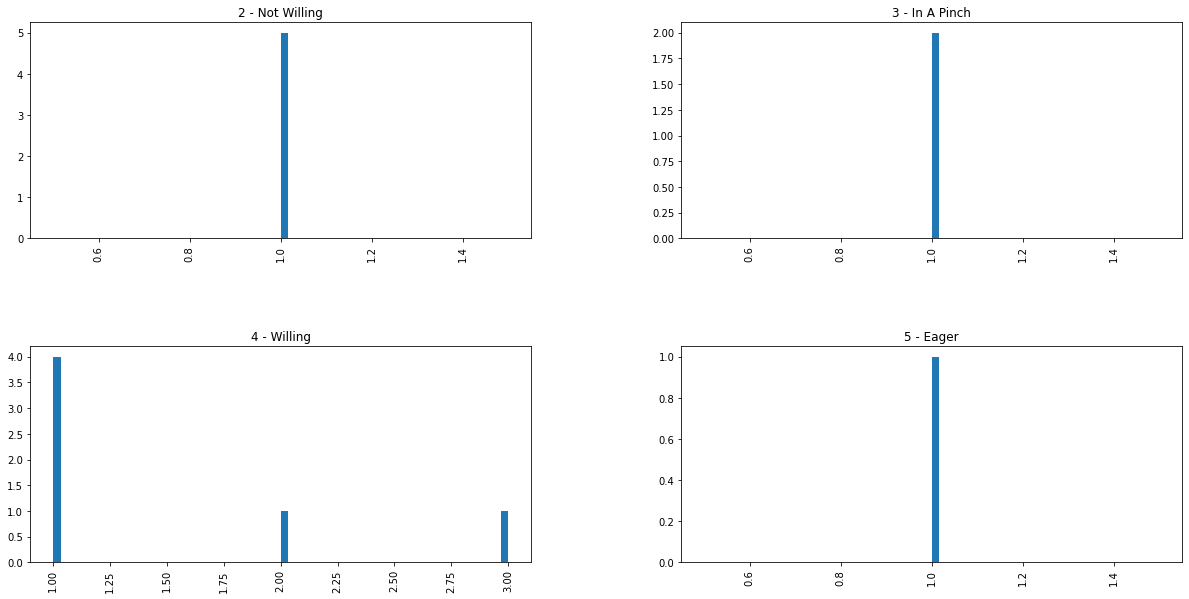

In [10]:
# Per reviewer, per bid type
df_pc_bids[df_pc_bids['Bid_nr']>=2].groupby('Email')['Bid'].value_counts().hist(by="Bid", bins=60, figsize=(20,10))

array([[<Axes: title={'center': '3 - In A Pinch'}>,
        <Axes: title={'center': '4 - Willing'}>],
       [<Axes: title={'center': '5 - Eager'}>, <Axes: >]], dtype=object)

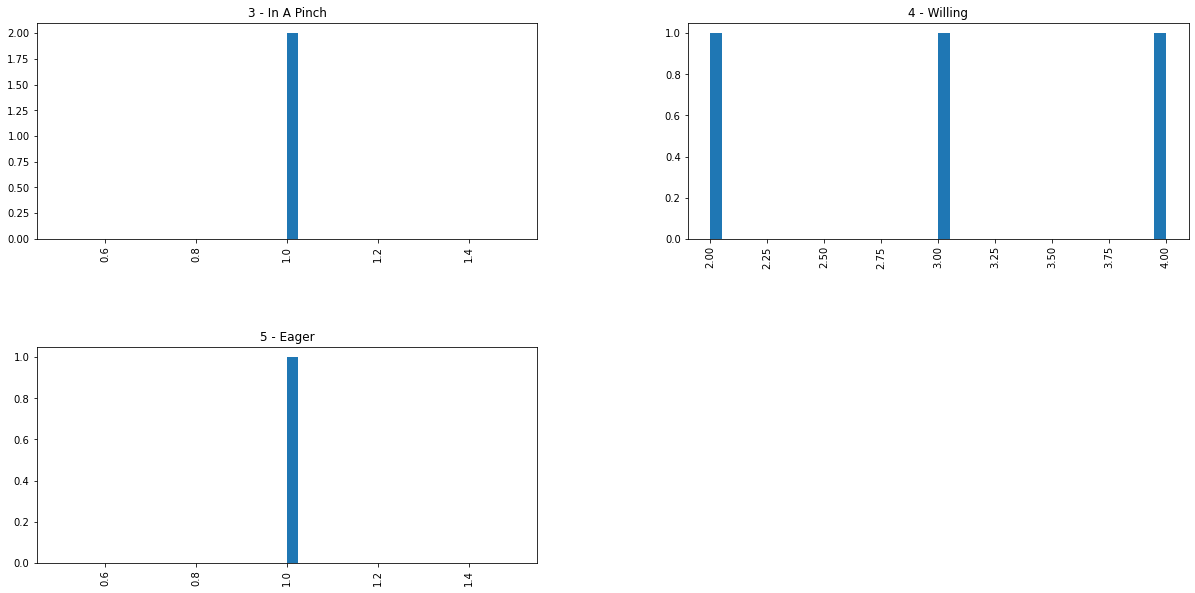

In [11]:
# Per paper, per bid type (does not contain 0s!)
df_pc_bids[df_pc_bids['Bid_nr']>=3].groupby('Paper ID')['Bid'].value_counts().hist(by="Bid", bins=40, figsize=(20,10))